## <p style='text-align: center;'> Analyse des emotions des Tweets 😀 😞 😡 </p> 

### <span style="color: Navy"> 1.Intorduction </span> 

La détection des émotions à partir de texte est un défi majeur en traitement du langage naturel (NLP) en raison du manque de jeux de données étiquetés et de leur complexité multi-classes. Les humains éprouvent une large gamme d'émotions qu'il est difficile de représenter avec suffisamment de données pour chaque émotion, entraînant un déséquilibre des classes. Ce jeu de données de classification des émotions a été compilé pour soutenir la recherche dans le domaine du NLP et de l'analyse des émotions. Il comprend une grande variété de textes étiquetés avec les émotions qu'ils véhiculent, allant de la joie à la colère et la tristesse. L'objectif est de construire un modèle efficace pour détecter les émotions à partir du texte en utilisant RNN.
lien de dataset: https://www.kaggle.com/datasets/simaanjali/emotion-analysis-based-on-text

### <span style="color: Navy"> 2.Importation des bibliotheques </span> 

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import ComplementNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, f1_score
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow.keras import layers, models


### <span style="color: Navy"> 3.Nettoyage des données : </span> 

In [6]:
df=pd.read_csv('datasets/text.csv')
df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [7]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416809 entries, 0 to 416808
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    416809 non-null  object
 1   label   416809 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 6.4+ MB


In [8]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [9]:
df.duplicated().sum()

686

In [10]:
df.drop_duplicates(inplace=True)
df.shape

(416123, 2)

In [11]:
Emotion ={0:'Sadness',1:'joy',2:'love',3:'anger',4:'fear',5:'surprise'}
df['Emotion'] = df['label'].map(Emotion)
df.head()


,text,label,Emotion
0,i just feel really helpless and heavy hearted,4,fear
1,ive enjoyed being able to slouch about relax a...,0,Sadness
2,i gave up my internship with the dmrg and am f...,4,fear
3,i dont know i feel so lost,0,Sadness
4,i am a kindergarten teacher and i am thoroughl...,4,fear


In [12]:
# Text preprocessing avec NLTK
import nltk
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### <span style="color: Navy"> 4.Normalisation des données</span>

In [13]:
def preprocess(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha()] # ne garder que les mots alphabétiques
    tokens = [word.lower() for word in tokens] # mettre en minuscule
    tokens = [word for word in tokens if not word in stop_words] # suppression des mots vides
    return ' '.join(tokens)

In [14]:
df['text'] = df['text'].apply(preprocess)

In [13]:
df.head()

,text,label,Emotion
0,feel really helpless heavy hearted,4,fear
1,ive enjoyed able slouch relax unwind frankly n...,0,Sadness
2,gave internship dmrg feeling distraught,4,fear
3,dont know feel lost,0,Sadness
4,kindergarten teacher thoroughly weary job take...,4,fear


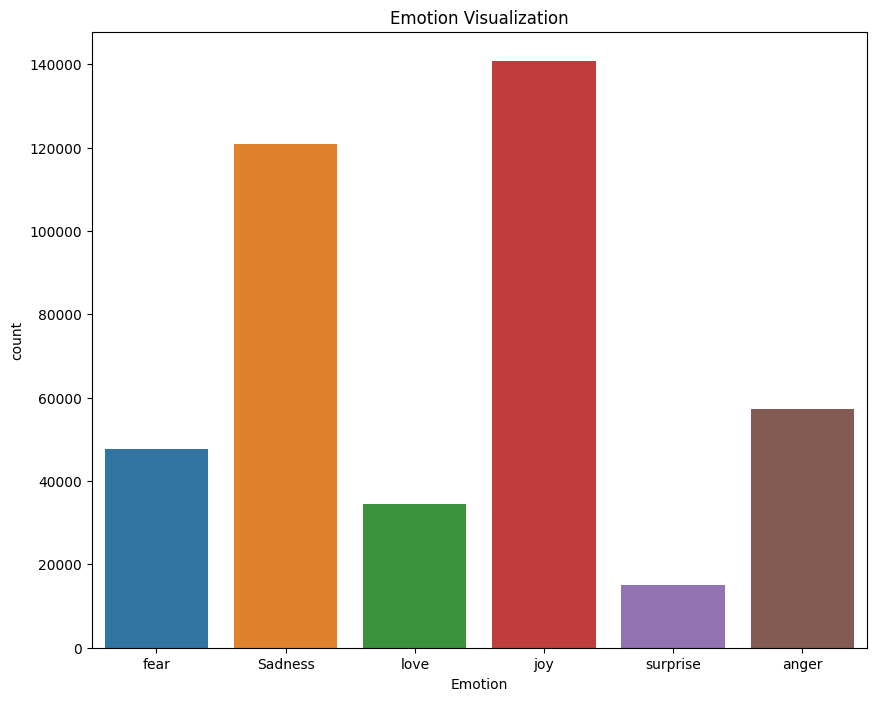

In [14]:
plt.figure(figsize=(10, 8))
sns.countplot(x='Emotion', data=df,hue=df['Emotion'])
plt.title('Emotion Visualization')
plt.show()

### <span style="color: Navy"> 6.Séparation des données: </span> 

In [15]:
# Prétraitement des données
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['text'])
X = tokenizer.texts_to_sequences(df['text'])
X = pad_sequences(X)


In [16]:

Y = df['label']

In [17]:
# Division du dataset en ensembles d'entraînement, de validation et de test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=42)



In [18]:
# Construction du modèle CNN
model = models.Sequential([
    layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=X.shape[1]),
    layers.Conv1D(128, 5, activation='relu'),
    layers.GlobalMaxPooling1D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(6, activation='softmax')  # 6 classes pour les émotions
])

C:\Users\pc\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [19]:
# Compilation du modèle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
# Entraînement du modèle
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
9396/9396 ━━━━━━━━━━━━━━━━━━━━ 1422s 151ms/step - accuracy: 0.9298 - loss: 0.1415 - val_accuracy: 0.9315 - val_loss: 0.1187
Epoch 2/10
9396/9396 ━━━━━━━━━━━━━━━━━━━━ 1436s 148ms/step - accuracy: 0.9382 - loss: 0.1012 - val_accuracy: 0.9326 - val_loss: 0.1116
Epoch 3/10
9396/9396 ━━━━━━━━━━━━━━━━━━━━ 1357s 144ms/step - accuracy: 0.9423 - loss: 0.0894 - val_accuracy: 0.9350 - val_loss: 0.1073
Epoch 4/10
9396/9396 ━━━━━━━━━━━━━━━━━━━━ 1405s 145ms/step - accuracy: 0.9430 - loss: 0.0854 - val_accuracy: 0.9348 - val_loss: 0.1179
Epoch 5/10
9396/9396 ━━━━━━━━━━━━━━━━━━━━ 1397s 149ms/step - accuracy: 0.9440 - loss: 0.0832 - val_accuracy: 0.9294 - val_loss: 0.1222
Epoch 6/10
9396/9396 ━━━━━━━━━━━━━━━━━━━━ 1374s 146ms/step - accuracy: 0.9448 - loss: 0.0818 - val_accuracy: 0.9334 - val_loss: 0.1403
Epoch 7/10
9396/9396 ━━━━━━━━━━━━━━━━━━━━ 1423s 148ms/step - accuracy: 0.9458 - loss: 0.0805 - val_accuracy: 0.9331 - val_loss: 0.1437
Epoch 8/10
9396/9396 ━━━━━━━━━━━━━━━━━━━━ 1411s 150ms/s

In [22]:
# Évaluation du modèle
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

1951/1951 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9344 - loss: 0.1548
Test accuracy: 0.9335138201713562


In [23]:
# Prédictions sur l'ensemble de test
y_pred_prob = model.predict(X_test   )
y_pred = y_pred_prob.argmax(axis=-1)

1951/1951 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step



### <span style="color: Navy"> 9.Évaluation du modèle :</span>

In [24]:
# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
recall_score=recall_score(y_test,y_pred,average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)
print("recall:", recall_score)


Accuracy: 0.9335138339287717
Precision: 0.9369563392977484
F1 Score: 0.9325536971557492
recall: 0.9335138339287717



### <span style="color: Navy"> 10.Visualisation :</span>

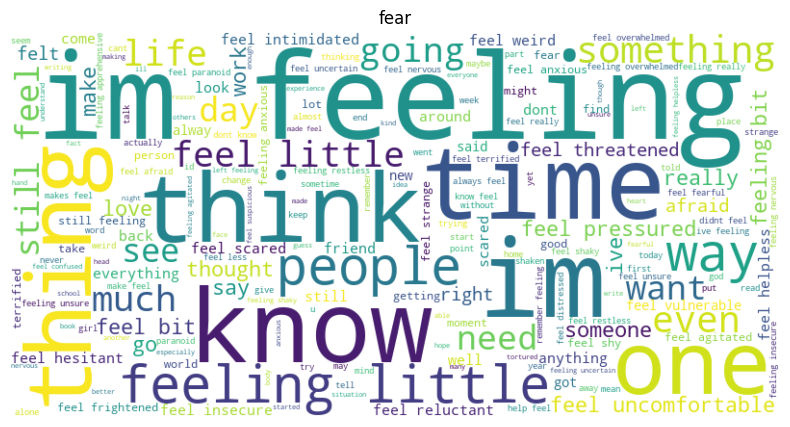

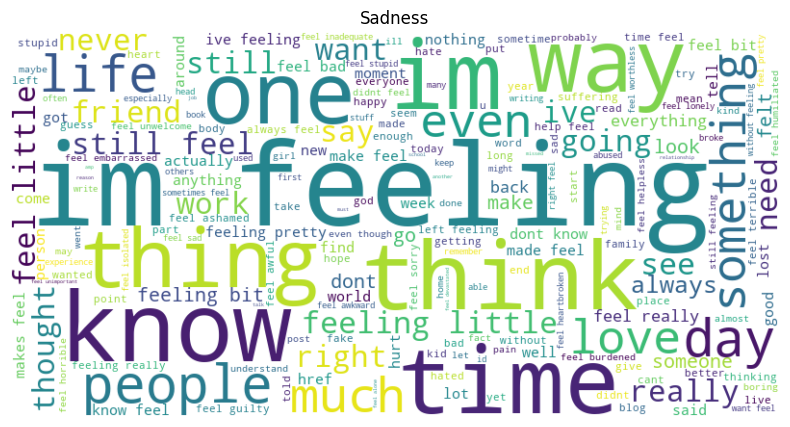

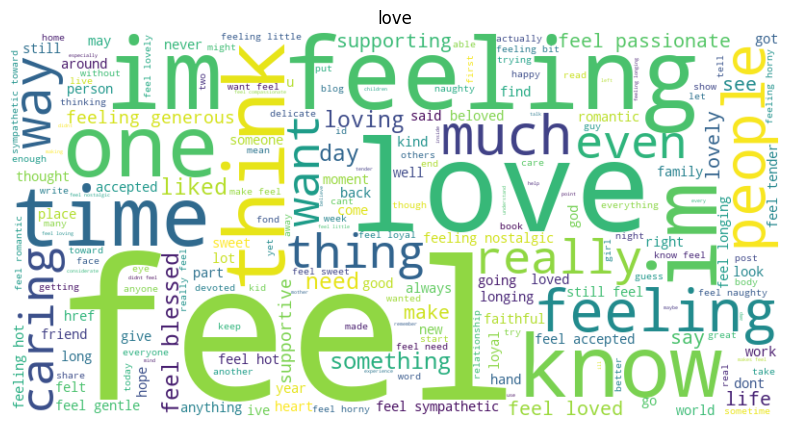

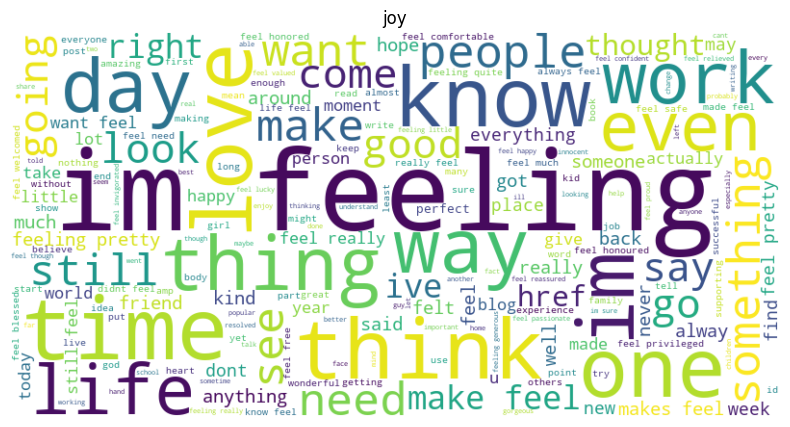

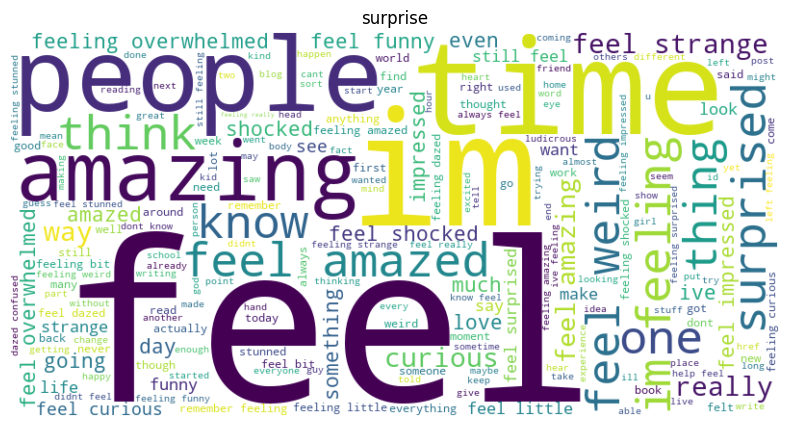

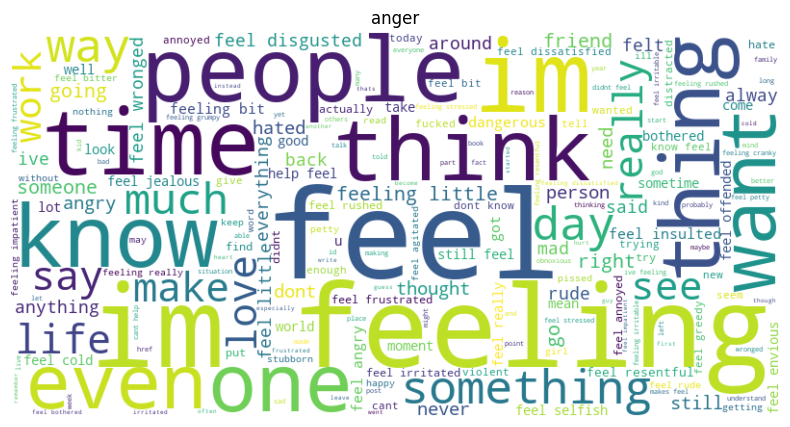

In [25]:

# Créer un dictionnaire pour stocker les textes associés à chaque émotion
emotion_texts = {}

# Filtrer les textes en fonction de l'émotion et les stocker dans le dictionnaire
for emotion in df['Emotion'].unique():
    emotion_texts[emotion] = " ".join(df[df['Emotion'] == emotion]['text'])

# Générer un nuage de mots pour chaque émotion
for emotion, text in emotion_texts.items():
    # Créer un objet WordCloud avec les paramètres appropriés
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Afficher le nuage de mots
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(emotion)
    plt.axis('off')
    plt.show()


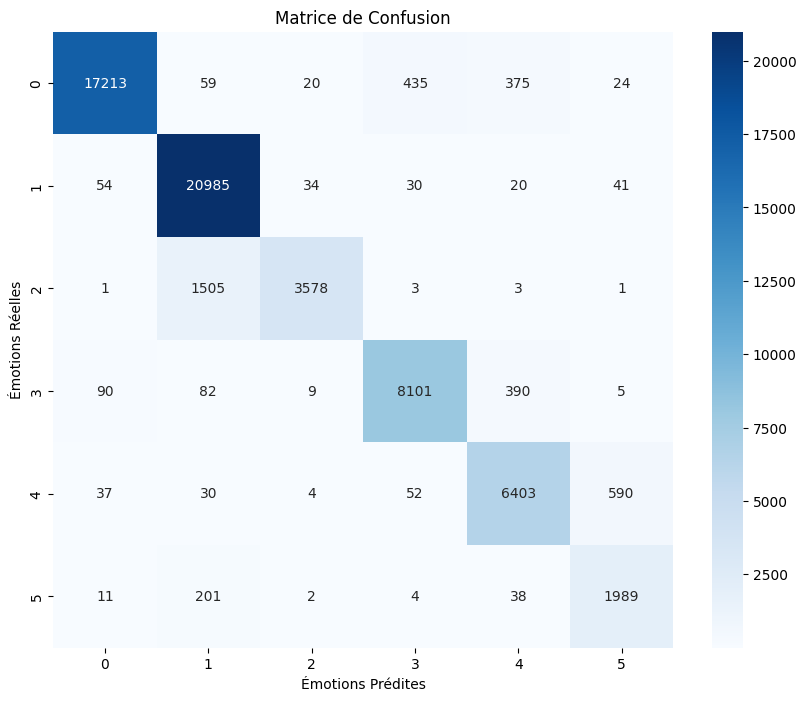

In [26]:

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

 # la matrice de confusion sous forme de heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Émotions Prédites')
plt.ylabel('Émotions Réelles')
plt.title('Matrice de Confusion')
plt.show()


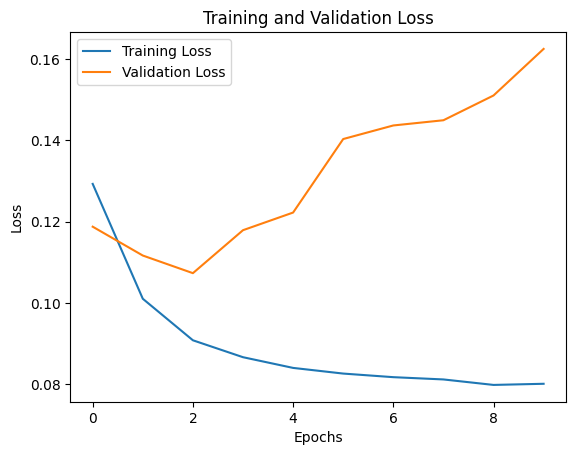

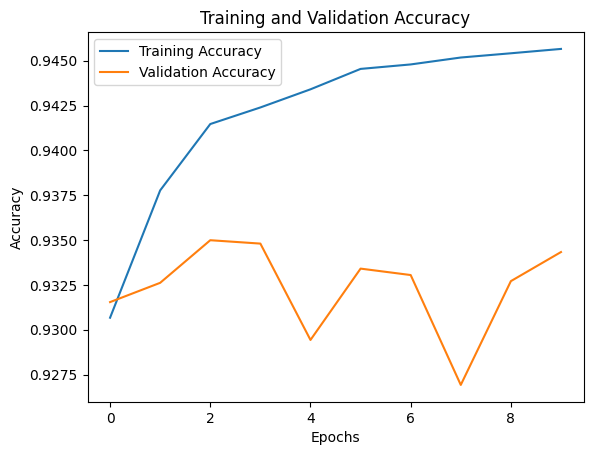

In [27]:
# Extraire les données d'historique
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### <span style="color: Navy"> 11.Prediction des nouveaux textes:</span>

In [17]:
# Convert tokenizer to JSON format
tokenizer_json = tokenizer.to_json()

# Save the JSON to a file
with open('tokenizer_cnn.json', 'w') as json_file:
    json_file.write(tokenizer_json)

In [19]:
from tensorflow.keras.preprocessing.text import tokenizer_from_json
import tensorflow as tf

# Charger le JSON à partir du fichier
with open('tokenizer_cnn.json') as json_file:
    tokenizer_json = json_file.read()

# Convertir le JSON en tokenizer
tokenizer = tokenizer_from_json(tokenizer_json)

In [20]:
# Charger le modèle
# Charger le modèle
model_cnn = tf.keras.models.load_model("emotion_detection_CNN.h5")

# Utiliser le modèle chargé pour prédire de nouvelles données
new_data = tokenizer.texts_to_sequences(["Surprised party!"])
new_data = pad_sequences(new_data, maxlen=79)  # Remarque : utilisez la même longueur que lors de l'entraînement
predictions = model_cnn.predict(new_data)
# Obtenir la classe prédite
predicted_class_index = tf.argmax(predictions, axis=1).numpy()[0]
emotion_label = Emotion[predicted_class_index]
print("Classe prédite:", emotion_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
Classe prédite: surprise
